# Calculating rice cell growth parameters

The purposes of this document is to walk through the calculations of growth paramaters $\mu_{max}$ and the starting inocculation density $m_0$ from the rice cell growth experiments.

In [37]:
import numpy as np #importing important packages 
import matplotlib.pyplot as pt
import scipy.stats as st 

[[ 7.63395879  4.7768339   2.71005761  4.44364114  0.78072562]
 [12.26253013 11.00536304  6.21110762  8.63065134  4.48989108]
 [15.46388889 14.78351327  9.85281752 11.65217344  2.74417694]
 [12.81842475 13.70571505 14.62674414 12.14185194  6.04683072]
 [ 9.70124947 14.86424441 12.25691589  8.18843201  7.95195324]]


<ErrorbarContainer object of 3 artists>

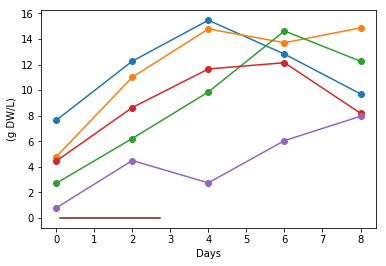

In [161]:
#processing data from excel sheet with some modifications with sublime text 
raw_data = np.array( [[8.75,7.218543046,6.933333333,2.88590604,5.874125874,5.570469799,3.285714286,3.020134228,1.824324324,3.886666667,4.256756757,5.1875,0.928571429,0.733333333,0.680272109],
[13.59477124,14.25531915,8.9375,11.18012422,12.30263158,9.533333333,6.490066225,6.845637584,5.297619048,8.75862069,9.6,7.533333333,3.642384106,7.032258065,2.795031056],
[17.4,16.86666667,12.125,15.51282051,12.17105263,16.66666667,10.63380282,8.421052632,10.50359712,11.70212766,12.07792208,11.17647059,3.164556962,3.267973856,1.8],
[14.5,12.08860759,11.86666667,12.1969697,12.93333333,15.98684211,13.69426752,14.13333333,16.05263158,11.0625,15.89285714,9.470198675,3.758389262,7.315436242,7.066666667],
[9.476744186,10.13333333,9.493670886,16.8,13.27044025,14.52229299,11.7,12.01342282,13.05732484,7.516778523,8.80952381,8.238993711,8.571428571,7.784431138,7.5]])
days = [0,2,4,6,8]

nDays = len(days)
nFlasks = 5 
nTrials = 3 
F_data = np.ndarray(shape=(nDays,nFlasks,nTrials), dtype=float)

i = 0
j = 0
flask_num = 0  
for row in raw_data:
    j = 0 
    flask_num = 0 
    for num in row: 
        #print("i is %d, flask_num is %d, j-3*flask_num is %d" % (i,flask_num,j-3*flask_num))
        F_data[i][flask_num][j-3*flask_num] = num
        if((j+1)%3==0): 
            flask_num += 1 
        j += 1

    i+= 1

F_avg = np.average(F_data,axis=2)
F_std = np.std(F_data,axis=2)

lF_data = np.log(F_data)
lF_avg = np.average(lF_data,axis=2)
lF_std = np.std(lF_data,axis=2)

print(F_avg)
pt.figure(1)
pt.plot(days,F_avg,'-o')
pt.xlabel("Days")
pt.ylabel("(g DW/L)")
pt.errorbar(F_std,0)
#F_gEnd = np.ndarray(shape=(1,5)) #find end of growth phase 

In [2]:
#this is currently an incomplete dataset used only for the first 10 
days = [0,2,4,6,8]
all_data_F5 = np.array(
[[0.928571429,0.733333333,0.680272109],
[3.642384106,7.032258065,2.795031056],
[3.164556962,3.267973856,1.8],
[3.758389262,7.315436242,7.066666667],
[8.571428571,7.784431138,7.5]])

all_data_ln_F5 = np.log(all_data_F5)

lF5_average = np.transpose(np.average(all_data_ln_F5,axis=1))
lF5_std = np.transpose(np.std(all_data_ln_F5,axis=1))


Text(0,0.5,'ln(g dw/L)')

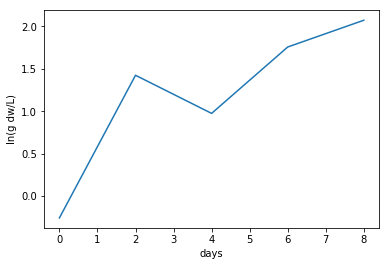

In [21]:
#plot of data
pt.figure(1)
pt.plot(days,lF5_average)
pt.xlabel("days")
pt.ylabel("ln(g dw/L)")



In [3]:
#now converting to d, G notation 
m = np.size(days) 
n = 2 #two model parameters 

#making G 
col1 = np.ones((m,1))
col2 = np.transpose(days)
G = np.matrix(np.column_stack((col1,col2)))

#defining d 
d = np.transpose(np.matrix(lF5_average))
#defining sigma for data 
sigma_d = lF5_std #s^2 != sigma^2 but we assume it does because what else?



using the formula $m = (G^{T}G)^{-1}G^Td$ that doesn't use the data's standard deviations 

In [4]:
#calculating m 
Gt = np.transpose(G)
m_unw = np.linalg.inv(Gt*G)*Gt*d
print(m_unw)

[[0.19612732]
 [0.24947256]]


using the formulas $G_{w} = WG$, $d_{w}=Wd$ and $m = (G^T_wG_{w})^{-1}G_{w}^Td_{w}$

In [5]:
#calculating m taking into account std 
W = np.diag(1./sigma_d)
Gw = W*G
Gwt = np.transpose(Gw)
dw = W*d
m_w = np.linalg.inv(Gwt*Gw)*Gwt*dw
print(m_w)

[[-0.15508071]
 [ 0.27979772]]


Calculating the coviarance matrix for m $Cov(m_{L2}) = (G^T_wG_w)^{-1}G_w^TCov(d_w)G_w(G_w^TG_w)^{-1}$
we assume $Cov(d_w) = I_m $ since the data should be linearly independent measurements.

In [6]:
invGwtGw = np.linalg.inv(Gwt*Gw)
np.identity(m)
#cov_m = invGwtGw*Gwt*np.cov(dw)*Gw*invGwtGw
cov_m = invGwtGw*Gwt*np.identity(m)*Gw*invGwtGw
print(cov_m)

[[ 0.01550295 -0.00197703]
 [-0.00197703  0.00030011]]


$\mu$ is with a standard deviation of 

In [7]:
print("mu is = %0.3f +/- %0.4f" % (m_w[1,0],cov_m[1,1]))

mu is = 0.280 +/- 0.0003


In [10]:
#calculating the initial innoculation density 
M_0 = np.exp(m_w[0,0])
#M_0_std = np.exp(cov_m[0,0]) this doesn't work so we assume cov_[0,0] is percent error and then do this
#source for this idea https://people.duke.edu/~rnau/411log.htm
M_0_std = cov_m[0,0]*M_0 #this seems reasonable 
print("M_0 is %f +/- %f"%(M_0,M_0_std))

M_0 is 0.856346 +/- 0.013276


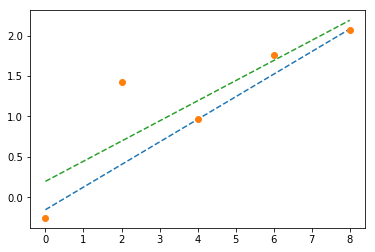

In [36]:
#plotting trendline and data
x_fake = np.linspace(0,8,32)
y_fake = x_fake*m_w[1,0] + m_w[0,0]
y_fake_un = x_fake*m_unw[1,0] + m_unw[0,0]
pt.figure(2)
pt.plot(x_fake,y_fake,'--')
pt.plot(days,lF5_average,'o')
pt.plot(x_fake,y_fake_un,'--')

In [51]:
#calculating P value 
r = (y_fake-d)
r_2norm = r*np.transpose(r)
print(st.chi2.cdf(r_2norm,m-1,loc=0,scale=1) )


[[1.         0.         0.99207663 0.         0.        ]
 [0.         0.99968057 0.99381867 0.99996646 0.99999615]
 [0.99207663 0.99381867 0.99339382 0.99411615 0.99438507]
 [0.         0.99996646 0.99411615 0.99999936 0.99999999]
 [0.         0.99999615 0.99438507 0.99999999 1.        ]]


In [ ]:
y